# Compare synthetic data generators
Compare the performance of different generators and settings

## Load libraries and define settings

In [3]:
# general dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pathlib import Path

# synthesis methods
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader
from synthcity.benchmark import Benchmarks

from synthesis.synthesizers.privbayes import PrivBayes
from synthesis.evaluation.metrics import MarginalComparison, AssociationsComparison
from synthesis.evaluation.efficacy import ClassifierComparison, FeatureImportanceComparison

# repo code
from crnsynth import config
from crnsynth.generators.privbayes_dk import PrivBayesDK
from crnsynth import util
from crnsynth import visual

In [4]:
# autoreload changes from local files
%load_ext autoreload
%autoreload 2

# pandas show full output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# params used
EPSILON = 1
DATASET_NAME = 'adult'
GENERATOR_NAME = 'privbayes-dk'
FNAME_SUFFIX = None

## Load and process dataset

In [6]:
df_original = pd.read_csv(config.PATH_DATA[DATASET_NAME])
df_original.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df_synth, generator = util.load_output(dataset_name=DATASET_NAME, generator_name=GENERATOR_NAME, epsilon=EPSILON, fname_suffix=FNAME_SUFFIX)
df_synth.head()

TypeError: load_output() got an unexpected keyword argument 'dataset_name'

## Compare generators

In [51]:
path_score = util.get_path_output(dataset_name=DATASET_NAME, output_type='reports') / f'{DATASET_NAME}_score_reports.csv'
score_report = pd.read_csv(path_score, index_col=0)
score_report

,min,max,mean,stddev,median,iqr,rounds,errors,durations,direction,measure
generator_name,,,,,,,,,,,
privbayes-dk_eps1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1,0,0.00,minimize,sanity.data_mismatch.score
privbayes-dk_eps1,0.000522,0.000522,0.000522,0.0,0.000522,0.0,1,0,0.01,minimize,sanity.common_rows_proportion.score
privbayes-dk_eps1,0.229076,0.229076,0.229076,0.0,0.229076,0.0,1,0,0.55,minimize,sanity.nearest_syn_neighbor_distance.mean
privbayes-dk_eps1,0.519272,0.519272,0.519272,0.0,0.519272,0.0,1,0,0.56,maximize,sanity.close_values_probability.score
privbayes-dk_eps1,0.000154,0.000154,0.000154,0.0,0.000154,0.0,1,0,0.58,minimize,sanity.distant_values_probability.score
privbayes-dk_eps1,0.002705,0.002705,0.002705,0.0,0.002705,0.0,1,0,0.05,minimize,stats.jensenshannon_dist.marginal
privbayes-dk_eps1,0.998504,0.998504,0.998504,0.0,0.998504,0.0,1,0,0.02,maximize,stats.chi_squared_test.marginal
privbayes-dk_eps1,0.991322,0.991322,0.991322,0.0,0.991322,0.0,1,0,0.02,maximize,stats.inv_kl_divergence.marginal
privbayes-dk_eps1,0.902527,0.902527,0.902527,0.0,0.902527,0.0,1,0,0.17,maximize,stats.ks_test.marginal


In [55]:
df = score_report.copy().reset_index()
df['generator'] = df['generator_name'].apply(lambda x: util.parse_filename_arg(x, arg_idx=0, arg_dtype=str))
df['epsilon'] = df['generator_name'].apply(lambda x: util.parse_filename_arg(x, arg_idx=1, strip='eps', arg_dtype=float))


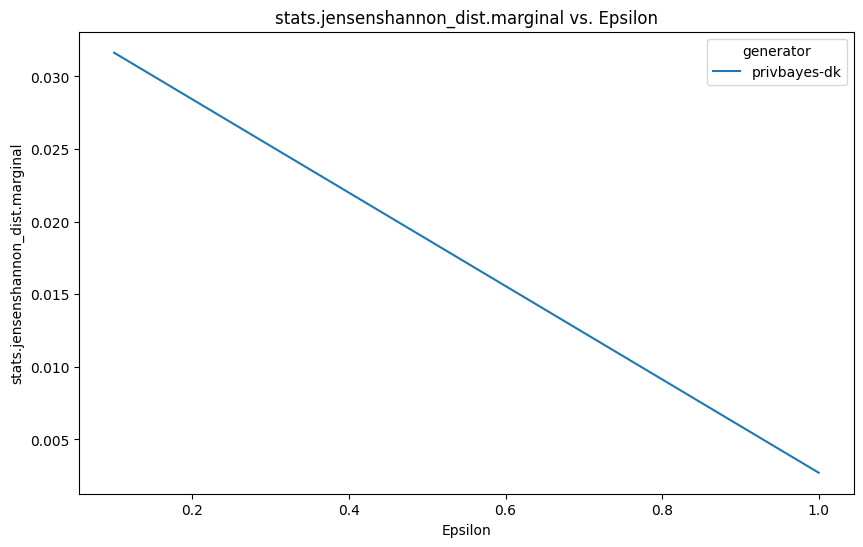

In [56]:
def plot_distance_metric(df, metric_name, hue='generator', hue_order=None, palette=None, figsize=(10, 6)):
    """Plot """
    # filter df to metric
    df_metric = df[df['measure'] == metric_name].reset_index().copy()

    fig, ax = plt.subplots(figsize=figsize)
    sns.lineplot(data=df_metric, x='epsilon', y='mean', hue=hue, hue_order=hue_order, palette=palette, ax=ax)
    ax.set_title(f'{metric_name} vs. Epsilon')
    ax.set_xlabel('Epsilon')
    ax.set_ylabel(metric_name)
    plt.show()

metric_name = 'stats.jensenshannon_dist.marginal'
plot_distance_metric(df, metric_name=metric_name)

In [53]:
def plot_distance_metric(df, metric_name, hue='generator', hue_order=None, palette=None, figsize=(10, 6)):
    df_metric = df[df['measure'] == metric_name].reset_index().copy()

    df_metric.loc[:, 'generator'] = df_metric['generator_name'].apply(lambda f: util.parse_filename_args(f, 'generator_name')).values

    df_metric.loc[:, 'epsilon'] = df_metric['generator_name'].apply(lambda f: util.parse_filename_args(f, 'epsilon')).values
    print(df_metric)

    fig, ax = plt.subplots(figsize=figsize)
    sns.lineplot(data=df_metric, x='epsilon', y='mean', hue=hue, hue_order=hue_order, palette=palette, ax=ax)
    ax.set_title(f'{metric_name} vs. Epsilon')
    ax.set_xlabel('Epsilon')
    ax.set_ylabel(metric_name)
    plt.show()

metric_name = 'stats.jensenshannon_dist.marginal'
plot_distance_metric(score_report, metric_name=metric_name)

IndexError: list index out of range